# Simulation and parameter recovery of dynamic foraging task.

In [ ]:
pip install -e /root/capsule

Obtaining file:///root/capsule
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 98.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 135.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 120.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 56.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.8/444.8 kB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 120.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 133.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from aind_behavior_gym.dynamic_foraging.task import CoupledBlockTask, UncoupledBlockTask
from aind_dynamic_foraging_models.generative_model import ForagerCollection

## Get all foragers

In [2]:
forager_collection = ForagerCollection()
df = forager_collection.get_all_foragers()
df.columns

Index(['agent_class_name', 'agent_kwargs', 'agent_alias',
       'number_of_learning_rate', 'number_of_forget_rate', 'choice_kernel',
       'action_selection', 'preset_name', 'n_free_params', 'params', 'forager',
       'win_stay_lose_switch'],
      dtype='object')

In [17]:
df

,agent_class_name,agent_kwargs,agent_alias,number_of_learning_rate,number_of_forget_rate,choice_kernel,action_selection,preset_name,n_free_params,params,forager,win_stay_lose_switch
0,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F0_softmax,1.0,0.0,none,softmax,None,3,"$\alpha$, $b_L$, $\beta$",<aind_dynamic_foraging_models.generative_model...,NaN
1,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F0_epsi,1.0,0.0,none,epsilon-greedy,Rescorla-Wagner,3,"$\alpha$, $b_L$, $\epsilon$",<aind_dynamic_foraging_models.generative_model...,NaN
2,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F0_CK1_softmax,1.0,0.0,one_step,softmax,None,4,"$\alpha$, $\alpha_{ck}$ (fixed), $w_{ck}$, $b_...",<aind_dynamic_foraging_models.generative_model...,NaN
3,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F0_CK1_epsi,1.0,0.0,one_step,epsilon-greedy,None,4,"$\alpha$, $\alpha_{ck}$ (fixed), $w_{ck}$, $b_...",<aind_dynamic_foraging_models.generative_model...,NaN
4,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F0_CKfull_softmax,1.0,0.0,full,softmax,None,5,"$\alpha$, $\alpha_{ck}$, $w_{ck}$, $b_L$, $\beta$",<aind_dynamic_foraging_models.generative_model...,NaN
5,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F0_CKfull_epsi,1.0,0.0,full,epsilon-greedy,None,5,"$\alpha$, $\alpha_{ck}$, $w_{ck}$, $b_L$, $\ep...",<aind_dynamic_foraging_models.generative_model...,NaN
6,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F1_softmax,1.0,1.0,none,softmax,None,4,"$\alpha$, $\delta$, $b_L$, $\beta$",<aind_dynamic_foraging_models.generative_model...,NaN
7,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F1_epsi,1.0,1.0,none,epsilon-greedy,None,4,"$\alpha$, $\delta$, $b_L$, $\epsilon$",<aind_dynamic_foraging_models.generative_model...,NaN
8,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F1_CK1_softmax,1.0,1.0,one_step,softmax,Bari2019,5,"$\alpha$, $\delta$, $\alpha_{ck}$ (fixed), $w_...",<aind_dynamic_foraging_models.generative_model...,NaN
9,ForagerQLearning,"{'number_of_learning_rate': 1, 'number_of_forg...",QLearning_L1F1_CK1_epsi,1.0,1.0,one_step,epsilon-greedy,None,5,"$\alpha$, $\delta$, $\alpha_{ck}$ (fixed), $w_...",<aind_dynamic_foraging_models.generative_model...,NaN


In [3]:
df[["agent_class_name", "preset_name", "n_free_params", "params"]]

,agent_class_name,preset_name,n_free_params,params
0,ForagerQLearning,None,3,"$\alpha$, $b_L$, $\beta$"
1,ForagerQLearning,Rescorla-Wagner,3,"$\alpha$, $b_L$, $\epsilon$"
2,ForagerQLearning,None,4,"$\alpha$, $\alpha_{ck}$ (fixed), $w_{ck}$, $b_..."
3,ForagerQLearning,None,4,"$\alpha$, $\alpha_{ck}$ (fixed), $w_{ck}$, $b_..."
4,ForagerQLearning,None,5,"$\alpha$, $\alpha_{ck}$, $w_{ck}$, $b_L$, $\beta$"
5,ForagerQLearning,None,5,"$\alpha$, $\alpha_{ck}$, $w_{ck}$, $b_L$, $\ep..."
6,ForagerQLearning,None,4,"$\alpha$, $\delta$, $b_L$, $\beta$"
7,ForagerQLearning,None,4,"$\alpha$, $\delta$, $b_L$, $\epsilon$"
8,ForagerQLearning,Bari2019,5,"$\alpha$, $\delta$, $\alpha_{ck}$ (fixed), $w_..."
9,ForagerQLearning,None,5,"$\alpha$, $\delta$, $\alpha_{ck}$ (fixed), $w_..."


## Initialize an agent

In [4]:
# Initialize the model
forager_gen = ForagerCollection().get_preset_forager("CompareToThreshold", seed=42)
forager_gen.set_params(
    threshold=0.2,
    learn_rate=0.3,
    softmax_inverse_temperature=10,
    biasL=3,
)

# forager_gen = ForagerCollection().get_preset_forager("Hattori2019", seed=42)
# forager_gen.set_params(
#     learn_rate_rew=0.2659, 
#     learn_rate_unrew=0.0643, 
#     forget_rate_unchosen=0.5541,
#     softmax_inverse_temperature=5.1442,
#     biasL=0.5099,
# )

# forager_gen = ForagerCollection().get_preset_forager("Rescorla-Wagner", seed=42)
# forager_gen.set_params(
#     biasL=0,
# )


# Create the task environment
# task = CoupledBlockTask(reward_baiting=True, num_trials=1000, seed=42)
task = UncoupledBlockTask(reward_baiting=False, num_trials=1000, seed=53)

## Simulation the task

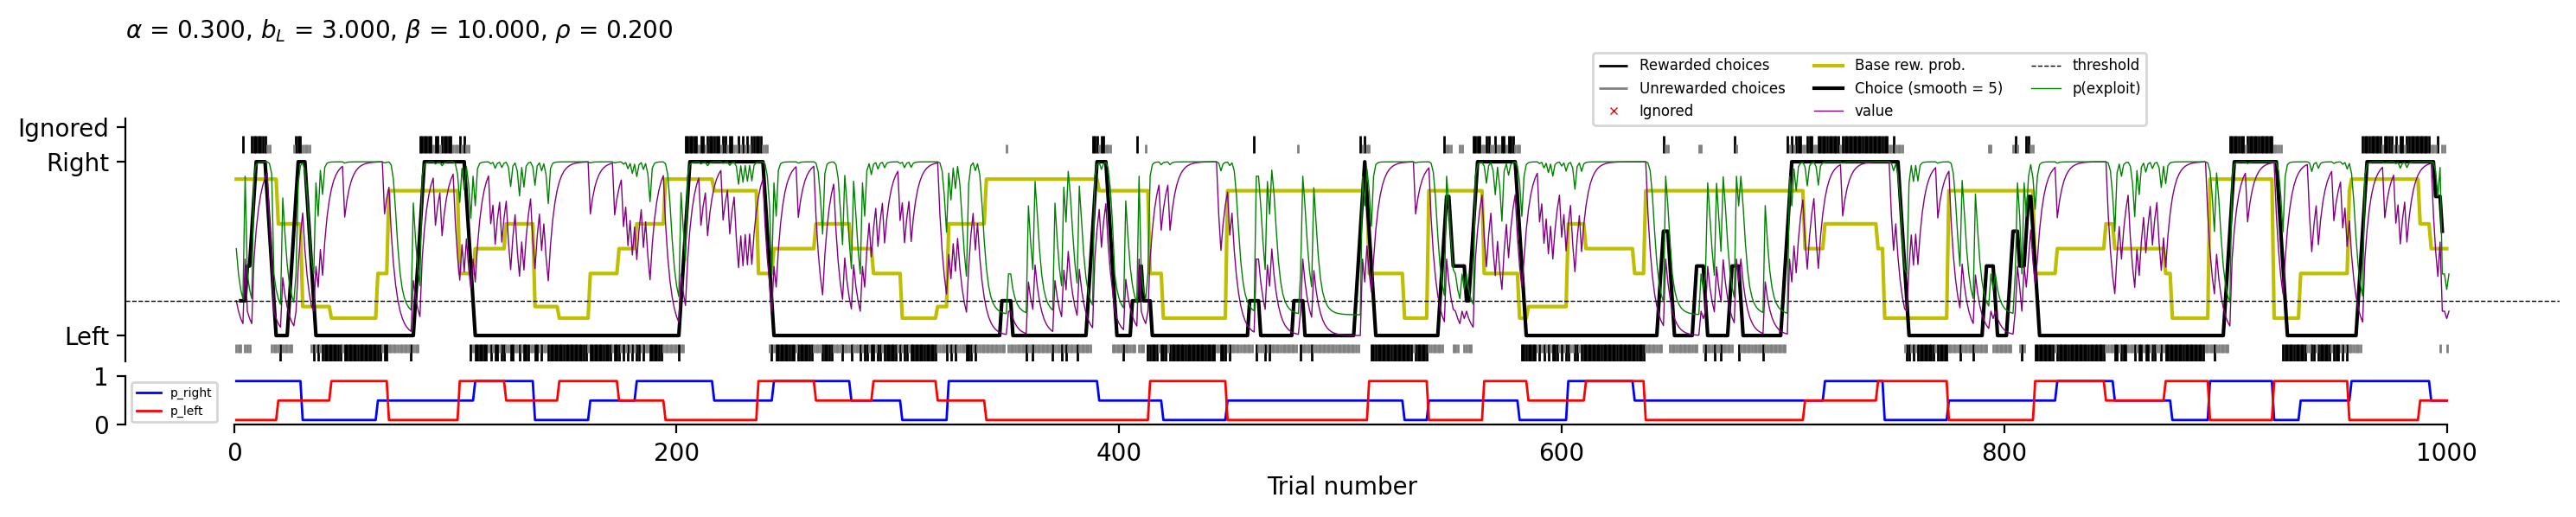

In [5]:
# Run the model
forager_gen.perform(task)

# Capture the results
ground_truth_params = forager_gen.params.model_dump()
ground_truth_choice_prob = forager_gen.choice_prob
# ground_truth_value = forager_gen.value
# Get the history
choice_history = forager_gen.get_choice_history()
reward_history = forager_gen.get_reward_history()

# Plot the session results
fig, axes = forager_gen.plot_session(if_plot_latent=True)

## Parameter Recovery

In [6]:
# Fit the model to recover parameters
forager_fit = ForagerCollection().get_preset_forager("CompareToThreshold", seed=42)
# forager_fit = ForagerCollection().get_preset_forager("Hattori2019", seed=42)
forager_fit.fit(
    choice_history,
    reward_history,
    # fit_bounds_override={"softmax_inverse_temperature": [0, 100]},
    clamp_params={
        # "biasL": 0, 
        # "softmax_inverse_temperature": 5.0
    },
    DE_kwargs=dict(
        workers=4, 
        disp=True, 
        seed=np.random.default_rng(42)
    ),
    k_fold_cross_validation=None,
)

fitting_result = forager_fit.fitting_result

2025-06-18 01:07:36,780 - aind_dynamic_foraging_models.generative_model.base - INFO - Fitting the model using the whole dataset...


differential_evolution step 1: f(x)= 148.3675583058348
differential_evolution step 2: f(x)= 148.3675583058348
differential_evolution step 3: f(x)= 148.3675583058348
differential_evolution step 4: f(x)= 147.504820767873
differential_evolution step 5: f(x)= 138.6828426547827
differential_evolution step 6: f(x)= 129.23892018026928
differential_evolution step 7: f(x)= 126.07772751781701
differential_evolution step 8: f(x)= 126.07772751781701
differential_evolution step 9: f(x)= 125.44431087313924
differential_evolution step 10: f(x)= 125.44431087313924
differential_evolution step 11: f(x)= 124.29848091665477
differential_evolution step 12: f(x)= 123.63872008793645
differential_evolution step 13: f(x)= 123.12347469499397
differential_evolution step 14: f(x)= 123.12347469499397
differential_evolution step 15: f(x)= 123.12347469499397
differential_evolution step 16: f(x)= 122.68320952309556
differential_evolution step 17: f(x)= 122.57904180502112
differential_evolution step 18: f(x)= 122.1927

In [7]:
# Check fitted parameters
fit_names = fitting_result.fit_settings["fit_names"]
ground_truth = [num for name, num in ground_truth_params.items() if name in fit_names]
print(f"Num of trials: {len(choice_history)}")
print(f"Fitted parameters: {fit_names}")
print(f'Ground truth: {[f"{num:.4f}" for num in ground_truth]}')
print(f'Fitted:       {[f"{num:.4f}" for num in fitting_result.x]}')
print(f"Likelihood-Per-Trial: {fitting_result.LPT}")
print(f"Prediction accuracy full dataset: {fitting_result.prediction_accuracy}\n")

Num of trials: 1000
Fitted parameters: ['learn_rate', 'threshold', 'softmax_inverse_temperature', 'biasL']
Ground truth: ['0.3000', '0.2000', '10.0000', '3.0000']
Fitted:       ['0.2912', '0.2321', '10.9937', '3.7456']
Likelihood-Per-Trial: 0.8852687216629911
Prediction accuracy full dataset: 0.953



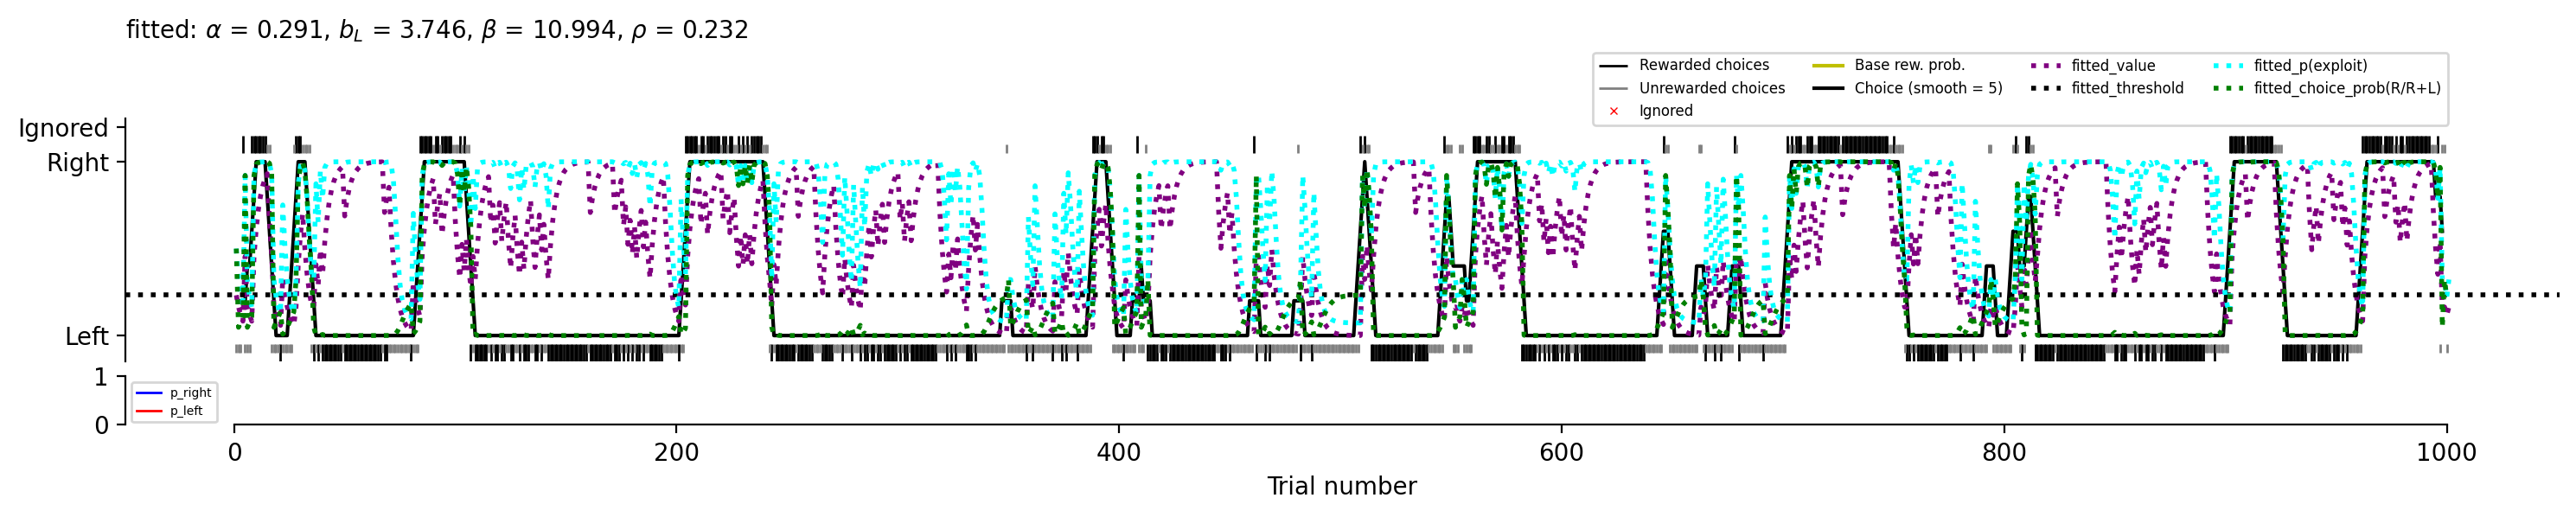

In [16]:
# Plot the fitted session results
fig_fitting, axes = forager_fit.plot_fitted_session(if_plot_latent=True)

# Overlay the ground truth Q-values for comparison
# axes[0].plot(ground_truth_q_value[0], lw=1, color="red", ls="-", label="actual_Q(L)")
# axes[0].plot(ground_truth_q_value[1], lw=1, color="blue", ls="-", label="actual_Q(R)")
# axes[0].legend(fontsize=6, loc="upper left", bbox_to_anchor=(0.6, 1.3), ncol=4)